In [1]:
from radiomics import featureextractor

import six, numpy as np
print("done")

done


In [2]:
import os
import SimpleITK as sitk

from radiomics import getTestCase

imagepath_1, labelpath_1 = getTestCase('brain1')
imagepath_2, labelpath_2 = getTestCase('brain2')

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)


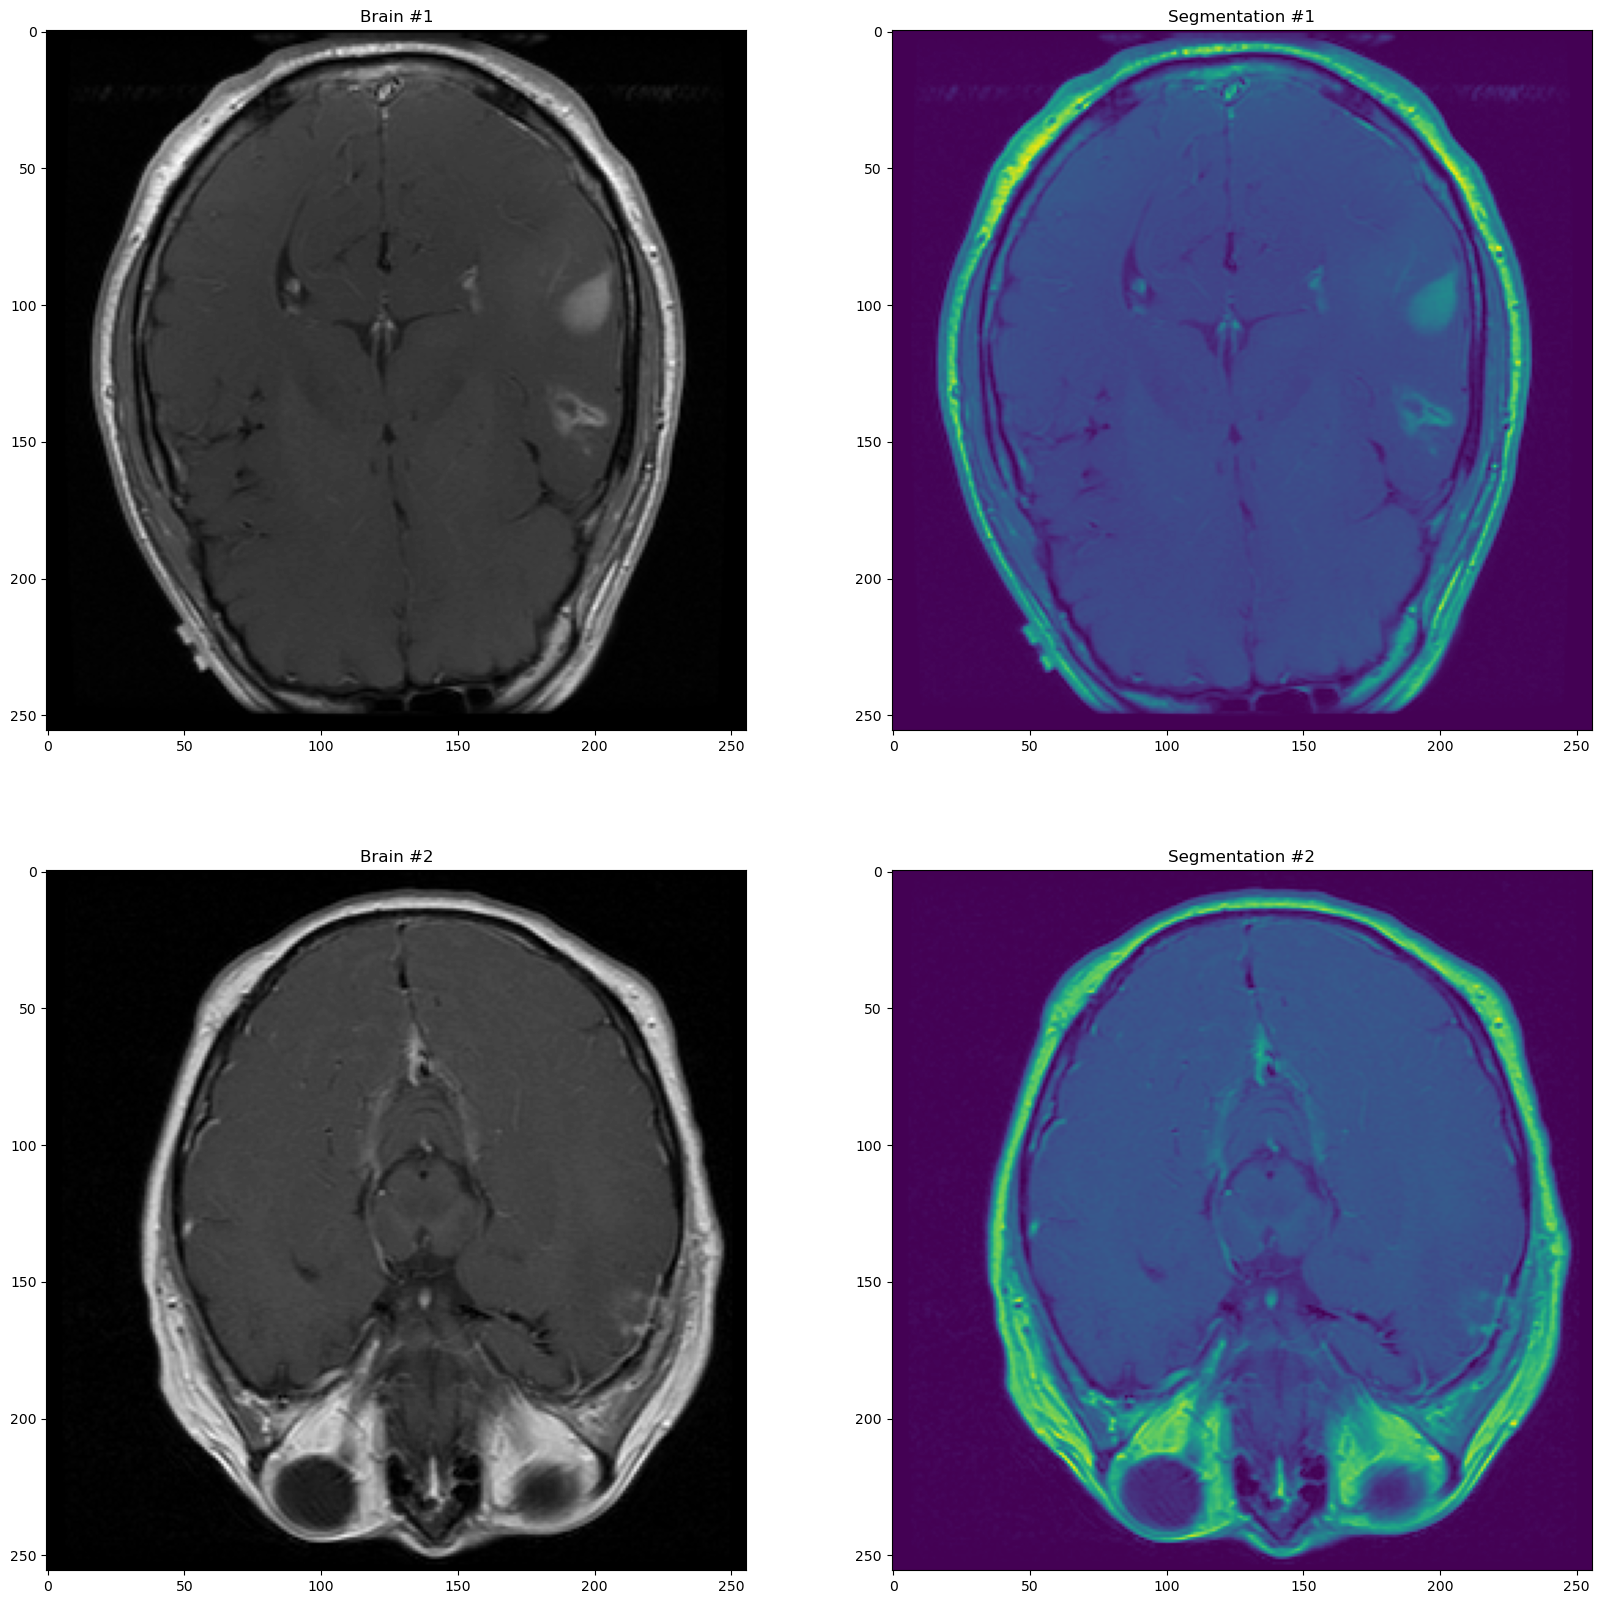

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:], cmap="gray")
plt.title("Brain #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(image_1)[12,:,:])
plt.title("Segmentation #1")

plt.subplot(2,2,3)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:], cmap="gray")
plt.title("Brain #2")
plt.subplot(2,2,4)
plt.imshow(sitk.GetArrayFromImage(image_2)[8,:,:])
plt.title("Segmentation #2")

plt.show()

In [6]:
import os

params = os.path.join(os.getcwd(), 'example_settings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)
result_1 = extractor.execute(image_1, label_1)
result_2 = extractor.execute(image_2, label_2)

In [7]:
feature_1 = np.array([])
feature_2 = np.array([])

for key, value in six.iteritems(result_1):
    if key.startswith("original_"):
        feature_1 = np.append(feature_1, result_1[key])
        feature_2 = np.append(feature_2, result_2[key])

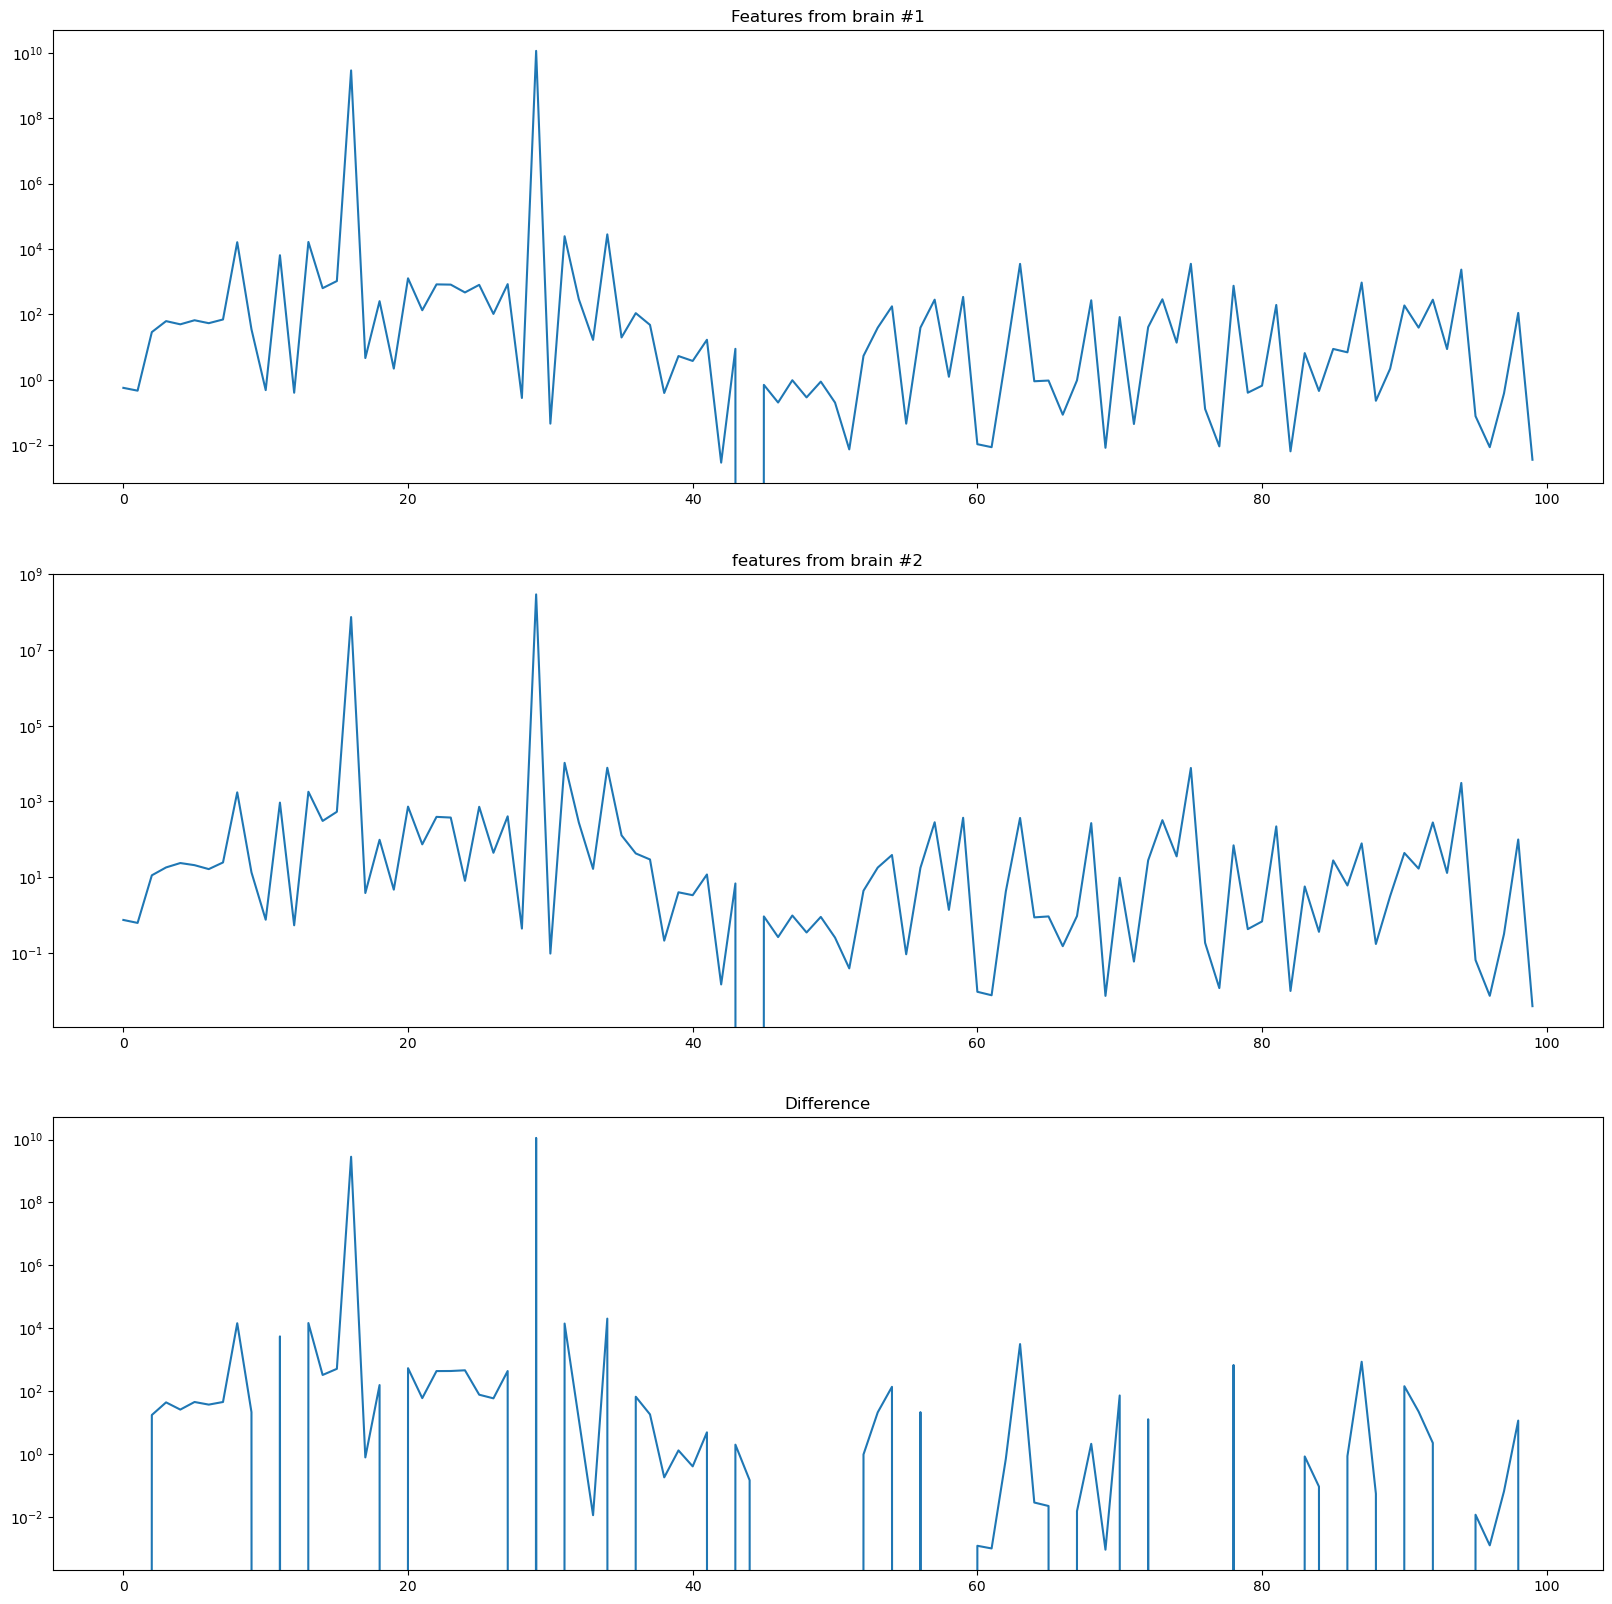

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
plt.plot(feature_1)
plt.yscale('log')
plt.title('Features from brain #1')

plt.subplot(3,1,2)
plt.plot(feature_2)
plt.yscale('log')
plt.title("features from brain #2")

plt.subplot(3,1,3)
plt.plot(feature_1 - feature_2)
plt.yscale('log')
plt.title("Difference")

plt.show()